In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
amostra_treino = np.random.choice(range(len(x_train)), size=30000, replace=False)
amostra_teste = np.random.choice(range(len(x_test)), size=3000, replace=False)

x_train = x_train[amostra_treino,:]
y_train = y_train[amostra_treino,:]

x_test = x_test[amostra_teste,:]
y_test = y_test[amostra_teste,:]

In [4]:
def classes(pred):
    dicionario = {0: "airplane",
                  1: "automobile",
                  2: "bird",
                  3: "cat",
                  4: "deer",
                  5: "dog",
                  6: "frog",
                  7: "horse",
                  8: "ship",
                  9: "truck"}
    return dicionario[np.argmax(pred)]

In [5]:
y_train

array([[2],
       [9],
       [3],
       ...,
       [6],
       [6],
       [4]], dtype=uint8)

(array([2937., 2991., 2968., 3053., 2993., 3000., 3013., 3048., 2997.,
        3000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

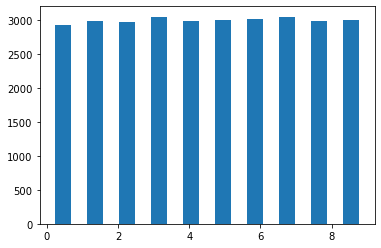

In [6]:
plt.hist(y_train, rwidth = 0.5)

(array([307., 304., 291., 311., 287., 306., 313., 292., 298., 291.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

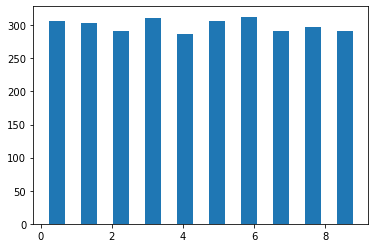

In [7]:
plt.hist(y_test, rwidth = 0.5)

In [8]:
type(x_train)

numpy.ndarray

In [9]:
print(len(x_train))
print(len(x_test))

30000
3000


In [10]:
# one hot encoding nos y
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
automobile


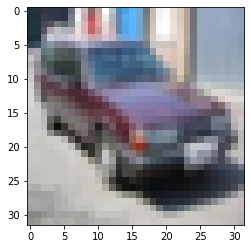

In [12]:
# mostrando o one hot encoding funcionando
i = np.random.randint(low=0, high=3000)
y_test[i]
plt.imshow(x_test[i])
print(y_test[i])
print(classes(y_test[i]))

In [13]:
model = keras. Sequential()
model.add(layers. Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(layers. Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers. MaxPooling2D((2, 2)))
model.add(layers. Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation= 'relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers. MaxPooling2D((2, 2)))
model.add(layers.Conv2D(118, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D (128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers. MaxPooling2D((2, 2)))
model.add(layers. Flatten())
model.add(layers. Dense (128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers. Dense (10, activation='softmax')) 
# sairá um vetor de tamanho 10 para comparar com a resposta da classe (são 10 classes)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

533.580 parâmetros treináveis

____

In [15]:
# compilando o modelo
opt = keras.optimizers.Adagrad()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# callbacks: tensorboard e early stopping
import datetime
!rm -rf ./logs/
log_dir = "logs/fit/" + (datetime.datetime.now() + datetime.timedelta(hours=-3)).strftime("%Y%m%d-%H%M%S")
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=2)

'rm' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.


In [17]:
# fit model
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(x_train,
          y_train,
          epochs=100,
          batch_size=128,
          validation_data=(x_test, y_test),
          callbacks=[callback])

Epoch 1/100
235/235 [==============================] - 194s 770ms/step - loss: 19.6710 - accuracy: 0.2067 - val_loss: 5.3563 - val_accuracy: 0.1967
Epoch 2/100
235/235 [==============================] - 208s 887ms/step - loss: 4.1754 - accuracy: 0.2362 - val_loss: 3.6175 - val_accuracy: 0.2270
Epoch 3/100
235/235 [==============================] - 167s 710ms/step - loss: 3.0579 - accuracy: 0.2285 - val_loss: 2.3791 - val_accuracy: 0.1613
Epoch 4/100
235/235 [==============================] - 159s 678ms/step - loss: 2.2839 - accuracy: 0.1768 - val_loss: 2.2697 - val_accuracy: 0.1807
Epoch 5/100
235/235 [==============================] - 122s 519ms/step - loss: 2.2294 - accuracy: 0.1962 - val_loss: 2.2457 - val_accuracy: 0.1950
Epoch 6/100
235/235 [==============================] - 93s 395ms/step - loss: 2.1918 - accuracy: 0.2113 - val_loss: 2.2206 - val_accuracy: 0.2040
Epoch 7/100
235/235 [==============================] - 84s 360ms/step - loss: 2.1625 - accuracy: 0.2234 - val_loss: 2.

Epoch 57/100
235/235 [==============================] - 83s 353ms/step - loss: 1.5485 - accuracy: 0.4532 - val_loss: 1.8058 - val_accuracy: 0.3817
Epoch 58/100
235/235 [==============================] - 82s 351ms/step - loss: 1.5410 - accuracy: 0.4549 - val_loss: 1.8072 - val_accuracy: 0.3817
Epoch 59/100
235/235 [==============================] - 83s 353ms/step - loss: 1.5350 - accuracy: 0.4593 - val_loss: 1.8061 - val_accuracy: 0.3860
Epoch 60/100
235/235 [==============================] - 84s 356ms/step - loss: 1.5283 - accuracy: 0.4601 - val_loss: 1.8193 - val_accuracy: 0.3877
Epoch 61/100
235/235 [==============================] - 83s 353ms/step - loss: 1.5217 - accuracy: 0.4607 - val_loss: 1.7944 - val_accuracy: 0.3807
Epoch 62/100
235/235 [==============================] - 83s 354ms/step - loss: 1.5150 - accuracy: 0.4652 - val_loss: 1.7968 - val_accuracy: 0.3890
Epoch 63/100
235/235 [==============================] - 83s 353ms/step - loss: 1.5083 - accuracy: 0.4682 - val_loss: 1

> Rodei uma vez com 100 Epoch e foi até acurácia de 50% (val acc 43%).

In [18]:
model.save('CNN_70acc_47accval.h5')

1/1 [==============================] - 0s 20ms/step
frog


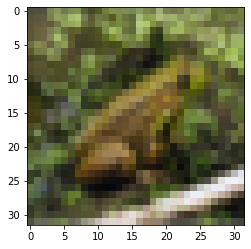

In [27]:
i = 2007
pred = model.predict(tf.expand_dims(x_test[i], 0))
plt.imshow(x_test[i])
print(classes(pred))

-----

 > ##### Usando a VGG "crua", sem treinar nada:

In [64]:
from keras.applications.vgg19 import preprocess_input, decode_predictions, VGG19
from tensorflow.keras.utils import load_img, img_to_array

In [57]:
img = keras.preprocessing.image.load_img('pexels-photo-9366080.jpeg', target_size=(224, 224)) # https://www.pexels.com/pt-br/foto/quintal-banco-assento-tribunal-6638801/
img_array = img_to_array(img)
img_array = img_array.reshape((1, 224, 224, 3))
img_alterada = preprocess_input(img_array)

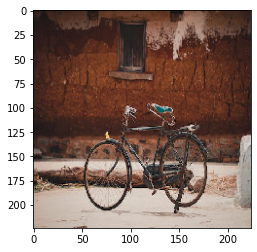

In [58]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


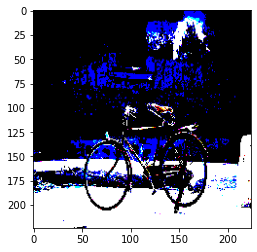

In [59]:
plt.imshow(img_alterada[0,:,:,:]) # para ver a imagem pré-processada para VGG

In [60]:
model = VGG19()
yhat = model.predict(img_alterada)
label = decode_predictions(yhat, top = 10)
label

35363/35363 [==============================] - 0s 1us/step


[[('n04482393', 'tricycle', 0.45301265),
  ('n02835271', 'bicycle-built-for-two', 0.17226952),
  ('n03599486', 'jinrikisha', 0.10404054),
  ('n03967562', 'plow', 0.043436904),
  ('n03538406', 'horse_cart', 0.022270892),
  ('n03764736', 'milk_can', 0.014132708),
  ('n03792782', 'mountain_bike', 0.012823709),
  ('n04613696', 'yurt', 0.0124242585),
  ('n03899768', 'patio', 0.007486241),
  ('n03792972', 'mountain_tent', 0.005099061)]]

Resultado: 45% de chance de ser um 'tricycle'

-----

 > ##### Transfer learning com a VGG16

In [65]:
# VGG16 was designed to work on 224 x 224 pixel input images sizes (base é a imagenet)
# Aqui vamos usar para as imagens 32 x 32 do CIFAR10

from keras.applications import vgg16

# Loads the VGG16 model without the top or FC layers
vgg16_model = vgg16.VGG16(weights='imagenet', include_top = False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 5s 0us/step


In [66]:
model2 = keras.Sequential()
for layer in vgg16_model.layers: # Ciclar os layers no vgg16 e adicioná-los
    model2.add(layer)

In [67]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

Todos os parâmetros são treináveis

----

In [68]:
# Congelando os pesos que não vou treinar
for layer in model2.layers:
    layer.trainable = False

In [69]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

Zero parâmetros treináveis

----

In [71]:
# Adicionando mais uns layers no final, com saída para 10 classes
model2.add(layers.Flatten())
model2.add(layers.Dense(300, activation='relu'))
model2.add(layers.Dense(10, activation='softmax')) # atribuirá um peso maior para a classe que acreditará ser a da imagem

In [72]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)        

Foram adicionados mais 163.220 parâmetros que serão treinados

----

In [73]:
model2.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>

In [74]:
# callbacks: early stopping
stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=20, verbose=2)

In [75]:
# compile model
opt = keras.optimizers.SGD()
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
# npré-processamento
input_test = tf.keras.applications.vgg16.preprocess_input(x_test)
input_train = tf.keras.applications.vgg16.preprocess_input(x_train)

In [77]:
# fit model
model2.fit(input_train,
           y_train,
           epochs=12,
           batch_size=32,
           validation_data=(input_test, y_test),
           callbacks=[stopper])

Epoch 1/12
938/938 [==============================] - 133s 141ms/step - loss: 2.1733 - accuracy: 0.2403 - val_loss: 1.9834 - val_accuracy: 0.3037
Epoch 2/12
938/938 [==============================] - 164s 175ms/step - loss: 1.8601 - accuracy: 0.3086 - val_loss: 1.7751 - val_accuracy: 0.3230
Epoch 3/12
938/938 [==============================] - 201s 214ms/step - loss: 1.7353 - accuracy: 0.3226 - val_loss: 1.7170 - val_accuracy: 0.3300
Epoch 4/12
938/938 [==============================] - 127s 136ms/step - loss: 1.6956 - accuracy: 0.3256 - val_loss: 1.6941 - val_accuracy: 0.3380
Epoch 5/12
938/938 [==============================] - 121s 129ms/step - loss: 1.6593 - accuracy: 0.3383 - val_loss: 1.6798 - val_accuracy: 0.3473
Epoch 6/12
938/938 [==============================] - 123s 132ms/step - loss: 1.6341 - accuracy: 0.3429 - val_loss: 1.6708 - val_accuracy: 0.3453
Epoch 7/12
938/938 [==============================] - 121s 129ms/step - loss: 1.6191 - accuracy: 0.3469 - val_loss: 1.6409 -

In [78]:
model2.save('vgg16_modificada.h5')

1/1 [==============================] - 0s 27ms/step
horse
2967


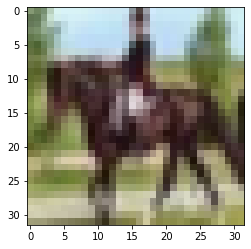

In [81]:
i = np.random.randint(0, len(x_test))
pred = model2.predict(tf.expand_dims(tf.keras.applications.vgg16.preprocess_input(x_test[i]), 0))

print(classes(pred))
plt.imshow(x_test[i])
print(i)

----